In [102]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns

In [2]:
os.chdir("/home/ministreliya/IB/hw_pandas_vis/")
os.listdir()

['alignment.bed', 'diffexpr_data.tsv.zip', 'rrna_annotation.gff']

In [3]:
!unzip diffexpr_data.tsv.zip

Archive:  diffexpr_data.tsv.zip
  inflating: diffexpr_data.tsv       


# Task 1

In [73]:
def read_gff(path_to_file):
    gff = pd.read_csv(path_to_file,
                      sep = "\t",
                      header = 0,
                      names = ["chr", "source", "type", "start", "end", "score", "strand", "phase", "atributes"])
    return gff


def read_bed6(path_to_file):
    bed = pd.read_csv(path_to_file,
                      sep = "\t",
                      names = ["chr", "start", "end","name", "score", "strand"])
    return bed

In [74]:
my_gff = read_gff("rrna_annotation.gff")
my_gff.head(4)

,chr,source,type,start,end,score,strand,phase,atributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA


In [75]:
my_bed = read_bed6("alignment.bed")
my_bed.head(4)

,chr,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+


In [76]:
my_gff["atributes"] = my_gff['atributes'].str[5:8].str.replace('_','')
my_gff.head(4)

,chr,source,type,start,end,score,strand,phase,atributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S


In [77]:
rRNA_num = my_gff[["chr", "atributes", "type"]].groupby(["chr", "atributes"]).count()
rRNA_num.reset_index(inplace = True)
rRNA_num.columns = ["Ref", "rRNA", "number"]
rRNA_num

,Ref,rRNA,number
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
5,Reference_11,16S,2
6,Reference_11,23S,2
7,Reference_11,5S,2
8,Reference_12,16S,2
9,Reference_12,23S,2


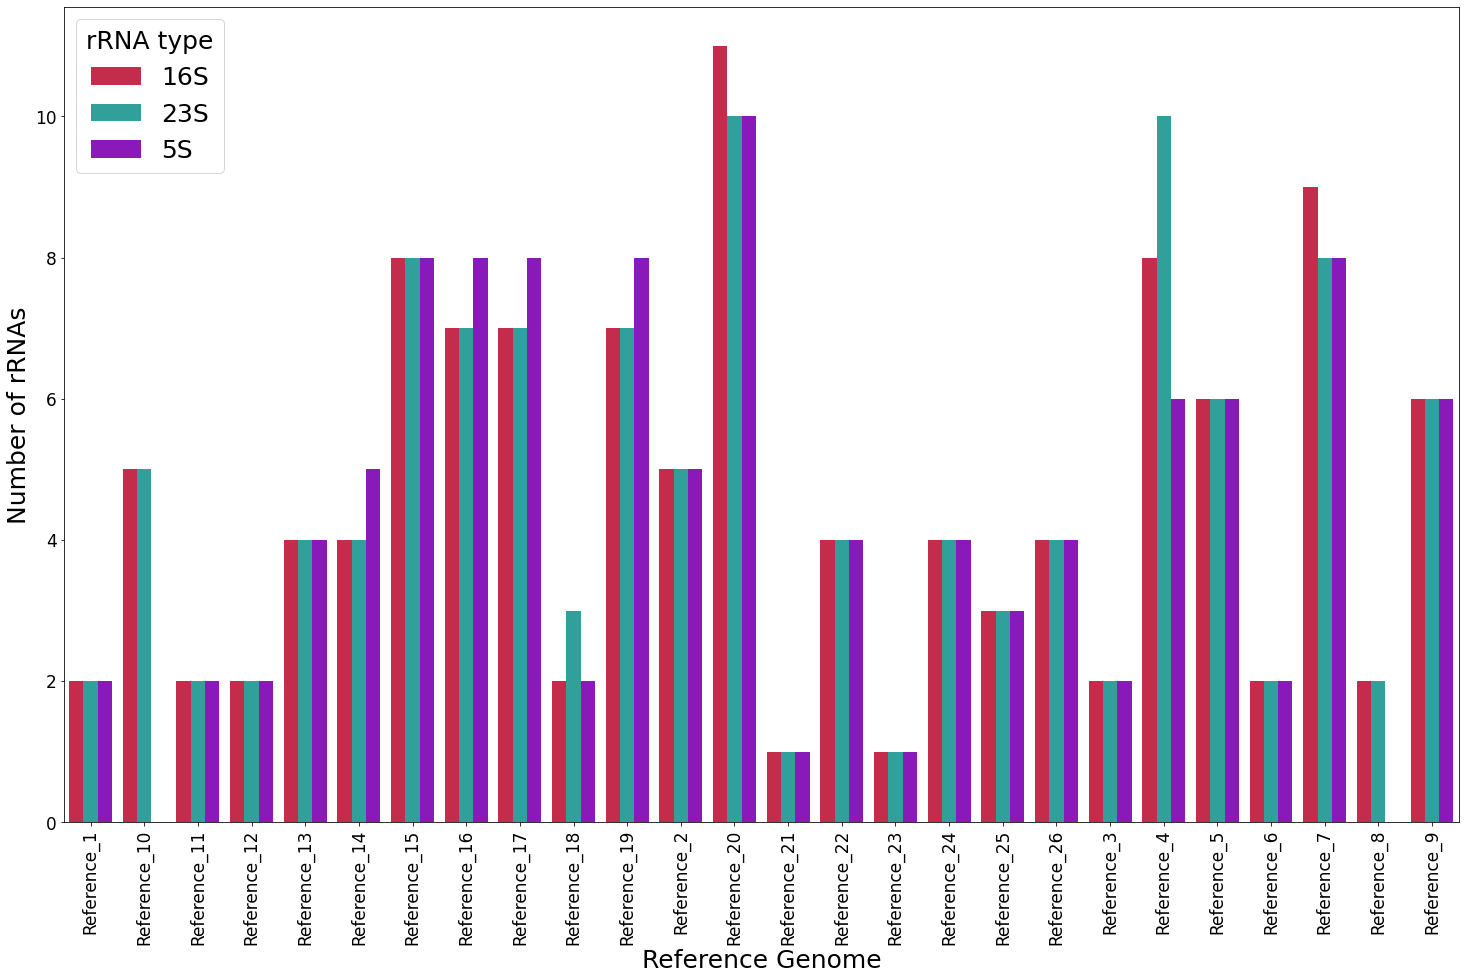

In [78]:
plt.subplots(figsize = (25,15))

sns.barplot(data = rRNA_num,
            x = "Ref",
            hue = "rRNA",
            y = "number",
            palette = ["#DC143C", "#20B2AA", "#9400D3"])

plt.xticks(rotation = 90, size = 17)
plt.yticks(size = 17)

plt.xlabel("Reference Genome", fontsize = 25)
plt.ylabel("Number of rRNAs", fontsize = 25)

plt.legend(title = "rRNA type", title_fontsize = 25, loc = 2, fontsize=25)

plt.show()

In [82]:
bed_intrsct = my_gff.merge(my_bed, on = "chr", suffixes = ('_gff', '_bed')).drop_duplicates()
bed_intrsct_rRNA = bed_intrsct.query('start_gff > start_bed & end_gff < end_bed')
bed_intrsct_rRNA

,chr,source,type,start_gff,end_gff,score_gff,strand_gff,phase,atributes,start_bed,end_bed,name,score_bed,strand_bed
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
269,Reference_11,barrnap:0.9,rRNA,2079929,2080038,1.400000e-12,+,.,5S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
285,Reference_12,barrnap:0.9,rRNA,691826,693271,0.000000e+00,+,.,16S,691101,697330,NODE_1092_length_6239_cov_1756.855110,21,+
308,Reference_12,barrnap:0.9,rRNA,693940,696699,0.000000e+00,+,.,23S,691101,697330,NODE_1092_length_6239_cov_1756.855110,21,+
331,Reference_12,barrnap:0.9,rRNA,696970,697080,2.600000e-09,+,.,5S,691101,697330,NODE_1092_length_6239_cov_1756.855110,21,+
363,Reference_12,barrnap:0.9,rRNA,2332870,2332980,2.600000e-09,-,.,5S,2332619,2338846,NODE_1092_length_6239_cov_1756.855110,0,-


# Task 2

In [83]:
diff_exp = pd.read_csv('diffexpr_data.tsv', sep = '\t')
diff_exp

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
5,DPPA3,7.192828,2.955274e-01,1.000000e+00,-0.000000
6,PRSS1,6.967870,5.522617e-01,1.000000e+00,-0.000000
7,CELA3B,6.897677,5.197769e-01,1.000000e+00,-0.000000
8,LIN28A,6.793619,1.876365e-01,1.000000e+00,-0.000000
9,CPA1,6.719453,4.713232e-01,1.000000e+00,-0.000000


In [94]:
sig_down = diff_exp.query("logFC < 0 & pval_corr < 0.05")
sig_up = diff_exp.query("logFC > 0 & pval_corr < 0.05")
nsig_down = diff_exp.query("logFC < 0 & pval_corr >= 0.05")
nsig_up = diff_exp.query("logFC > 0 & pval_corr >= 0.05")

Text(0.5, 1.0, 'Volcano plot')

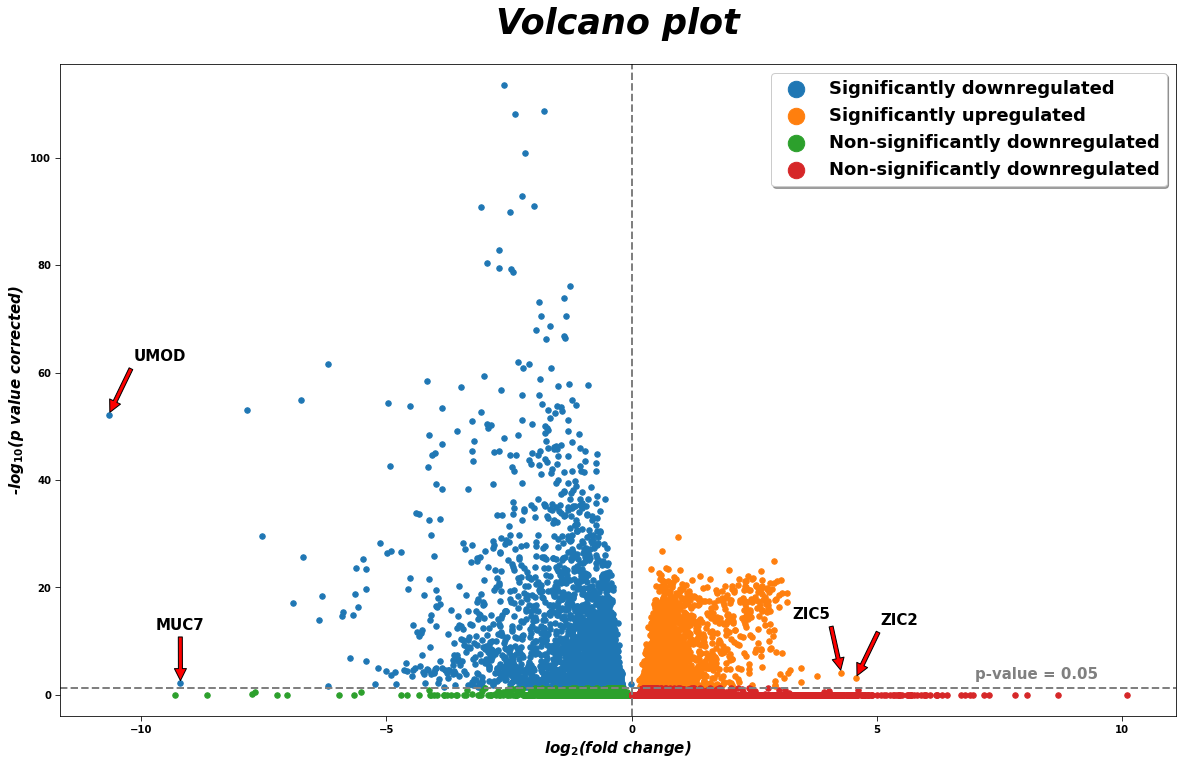

In [132]:
plt.rc("font", weight="bold")

plt.figure(figsize = (20, 12))

plt.scatter(x = sig_down["logFC"], y = sig_down["log_pval"], label = "Significantly downregulated", s = 30)
plt.scatter(x = sig_up["logFC"], y = sig_up["log_pval"], label = "Significantly upregulated", s = 30)
plt.scatter(x = nsig_down["logFC"], y = nsig_down["log_pval"], label = "Non-significantly downregulated", s = 30)
plt.scatter(x = nsig_up["logFC"], y = nsig_up["log_pval"], label = "Non-significantly downregulated", s = 30)

plt.axhline(-np.log10(0.05), linestyle = "--", color = "grey", lw = 2)
plt.text(7, 3, s = "p-value = 0.05", color = "grey", size = 15)
plt.axvline(0, linestyle = "--", color = "grey", lw = 2)

plt.legend(shadow=True, markerscale = 3, fontsize = 18)

plt.xlabel("log$_{2}$(fold change)", style = "italic", weight = "bold", size = 15)
plt.ylabel("-log$_{10}$(p value corrected)", style = "italic", weight = "bold", size = 15)

plt.tick_params(which = "major", size = 5)
plt.tick_params(which = "minor", size = 3)


plt.xlim([diff_exp["logFC"].min() - 1, diff_exp["logFC"].max() + 1])
plt.ylim([diff_exp["log_pval"].min() - 4, diff_exp["log_pval"].max() + 4])

plt.annotate(xy = (sig_down.sort_values(by = "logFC").iloc[0]["logFC"], sig_down.sort_values(by = "logFC").iloc[0]["log_pval"]),
             xytext = (sig_down.sort_values(by = "logFC").iloc[0]["logFC"] + 0.5, sig_down.sort_values(by = "logFC").iloc[0]["log_pval"] + 10), 
             text = sig_down.sort_values(by = "logFC").iloc[0]["Sample"],
             arrowprops = dict(facecolor = "red", shrink = 0.05),
             weight = "bold", size = 15)

plt.annotate(xy = (sig_down.sort_values(by = "logFC").iloc[1]["logFC"], sig_down.sort_values(by = "logFC").iloc[1]["log_pval"]),
             xytext = (sig_down.sort_values(by = "logFC").iloc[1]["logFC"] - 0.5, sig_down.sort_values(by = "logFC").iloc[1]["log_pval"] + 10), 
             text = sig_down.sort_values(by = "logFC").iloc[1]["Sample"],
             arrowprops = dict(facecolor = "red", shrink = 0.05),
             weight = "bold", size = 15)

plt.annotate(xy = (sig_up.sort_values(by = "logFC").iloc[-1]["logFC"], sig_up.sort_values(by = "logFC").iloc[-1]["log_pval"]),
             xytext = (sig_up.sort_values(by = "logFC").iloc[-1]["logFC"] + 0.5, sig_up.sort_values(by = "logFC").iloc[-1]["log_pval"] + 10), 
             text = sig_up.sort_values(by = "logFC").iloc[-1]["Sample"],
             arrowprops = dict(facecolor = "red", shrink = 0.05),
             weight = "bold", size = 15)

plt.annotate(xy = (sig_up.sort_values(by = "logFC").iloc[-2]["logFC"], sig_up.sort_values(by = "logFC").iloc[-2]["log_pval"]),
             xytext = (sig_up.sort_values(by = "logFC").iloc[-2]["logFC"] - 1, sig_up.sort_values(by = "logFC").iloc[-2]["log_pval"] + 10), 
             text = sig_up.sort_values(by = "logFC").iloc[-2]["Sample"],
             arrowprops = dict(facecolor = "red", shrink = 0.05),
             weight = "bold", size = 15)

plt.title("Volcano plot", style = "italic", weight = "bold", size = 35, pad = 30)
